<a href="https://colab.research.google.com/github/estebanmgr/California_Housing_Price/blob/main/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del precio de la vivienda en California

## Carga y procesamiento de datos


Se cargan las librerías para hacer el análisis exploratorio y los gráficos del dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from warnings import simplefilter
simplefilter(action="ignore",category=FutureWarning)

Se importa el dataset de la librería de Sklearn.

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing()

Aquí se puede ver una breve explicación del dataset ofrecida por el paquete de skearn.

In [ ]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Separando las variables independientes y dependientes

In [ ]:
X = pd.DataFrame(california.data)
X.columns=california.feature_names
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
Y=pd.DataFrame(california.target)
Y.columns=["Median_house_value"]
Y.head()

,Median_house_value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
df=X.join(Y)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

Análisis descriptivo de las diferentes columnas del dataset.

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Los valores de las columnas "MedInc", "AveRooms", "AveBedrms", "Population", y "AveOccup" tienen valores máximos que no concuerdan con los datos generales del dataset, se trabajarán más adelante y se verá cuanto afectan al resultado del algoritmo aplicado.

A priori, no se observa que existan valores faltantes en las columnas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   Median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Se corrobora que no exita ningun valor nulo y que los formatos de las columnas son los correctos.


---

### Análisis visual del dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb56721e690>,
      dtype=object)

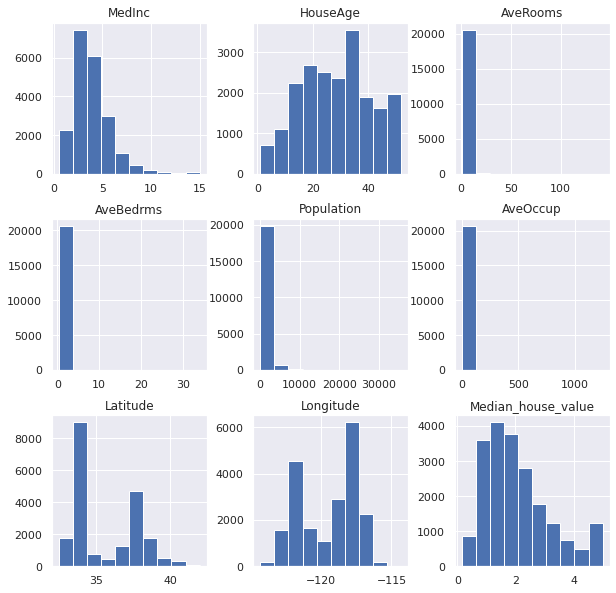

In [ ]:
df.hist(figsize=(10,10))

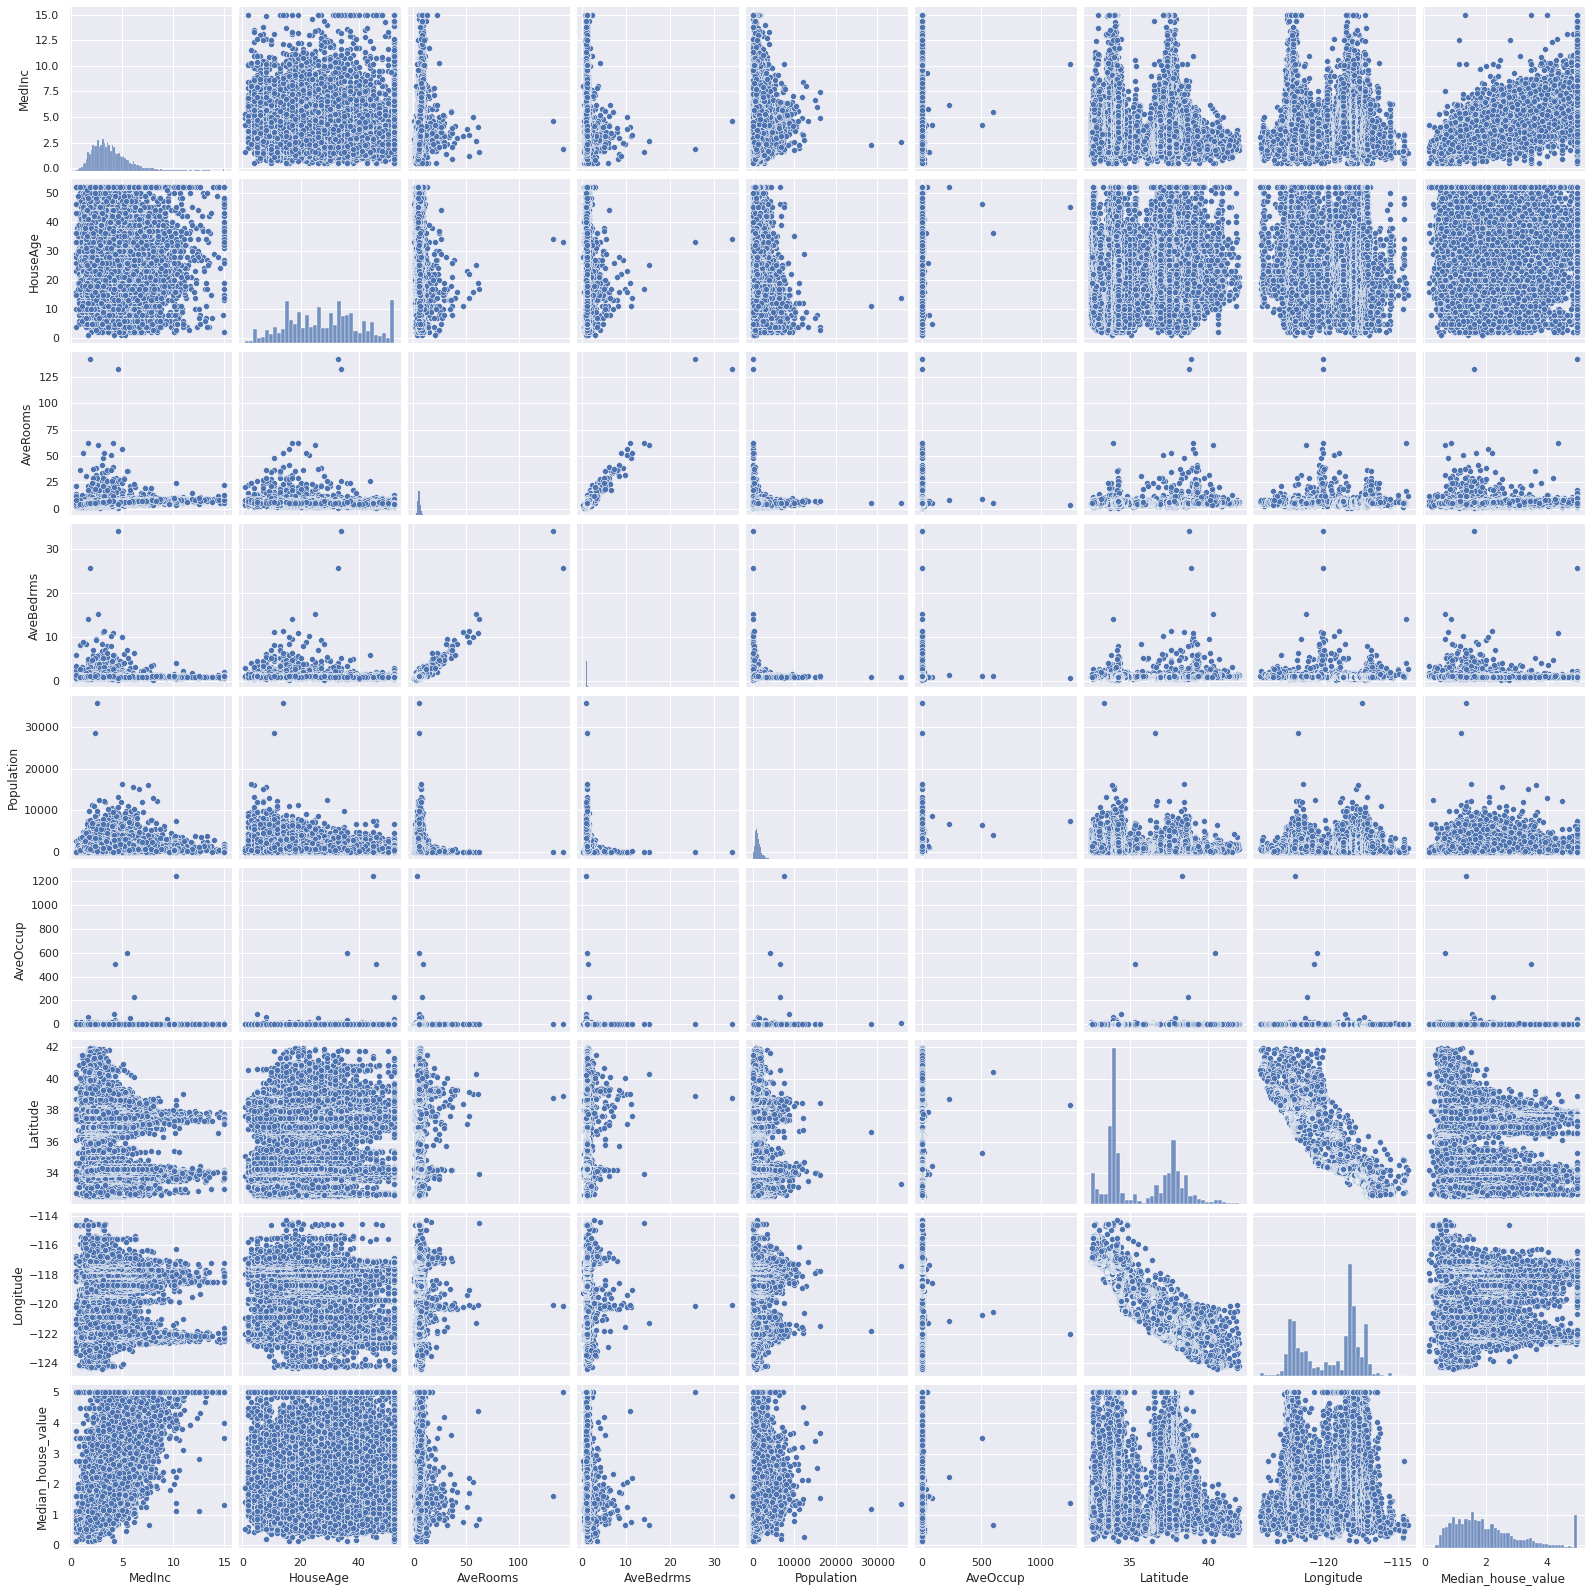

In [ ]:
sns.pairplot(df)

Análisis de correlación entre variables.

In [ ]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Median_house_value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


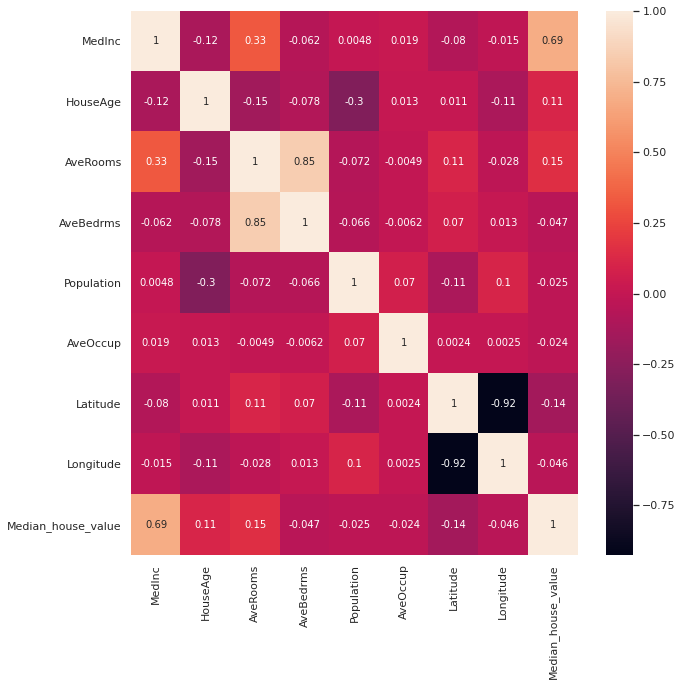

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax)

Se puede observar que la variable que más correlación tiene con el precio de la vivienda es la variable de ingresos medios.

In [ ]:
from scipy.stats import skew

In [ ]:
list(zip(X.columns, skew(X)))

[('MedInc', 1.6465370299000663),
 ('HouseAge', 0.06032625301661283),
 ('AveRooms', 20.696364720751195),
 ('AveBedrms', 31.31468025924831),
 ('Population', 4.935499508858495),
 ('AveOccup', 97.6324649221167),
 ('Latitude', 0.46591914016269853),
 ('Longitude', -0.2977795649858688)]

Ninguna de las variables tiene una distribución normal y a mayores, como se evidenció anterioremente, se observa como las variables "AveRooms", AveBedrms", "AveOccup" y "Population" están cesgadas.

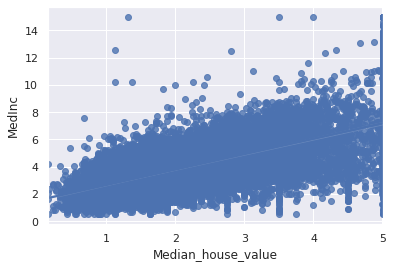

In [ ]:
sns.regplot(x=df["Median_house_value"],y=df["MedInc"])

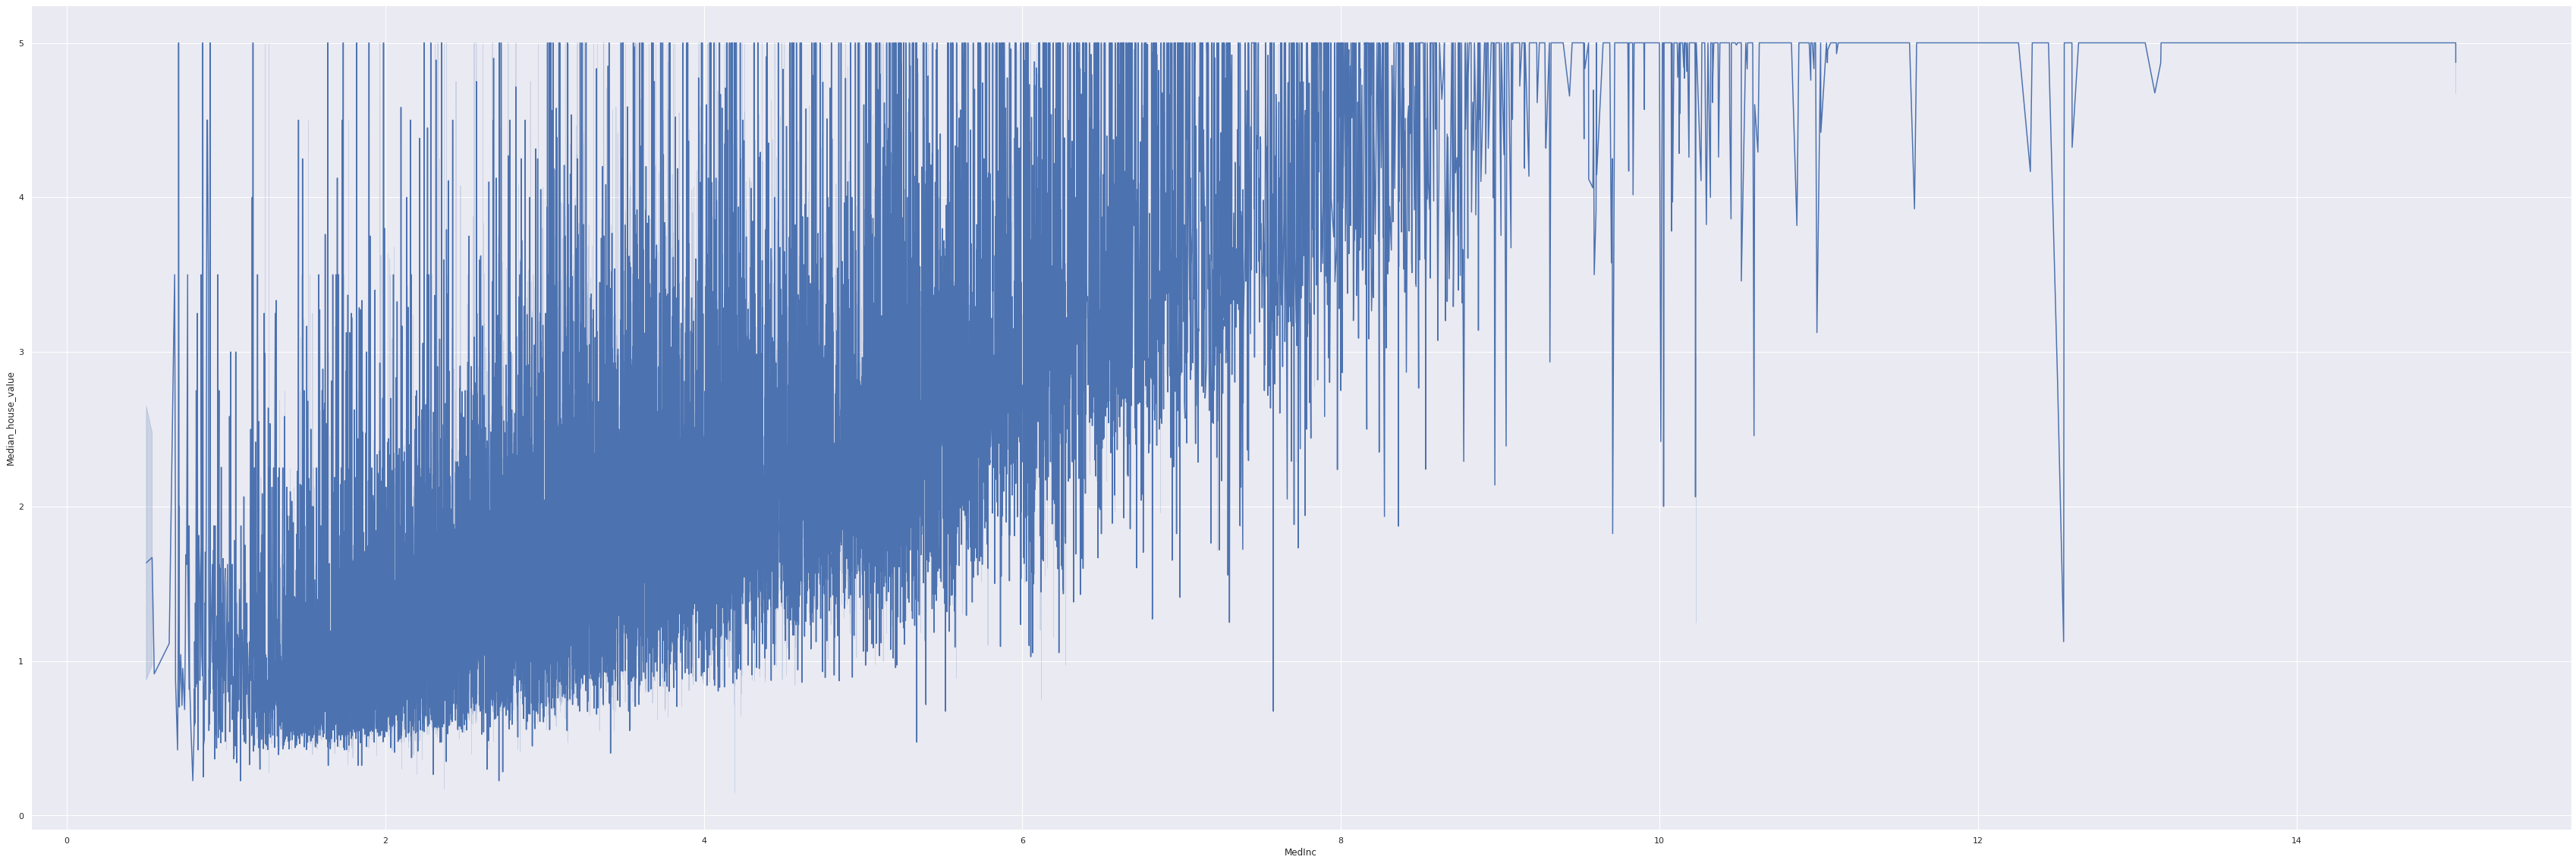

In [ ]:
fig, ax = plt.subplots(figsize=(60,20))
sns.lineplot(x=df["MedInc"], y=df["Median_house_value"])

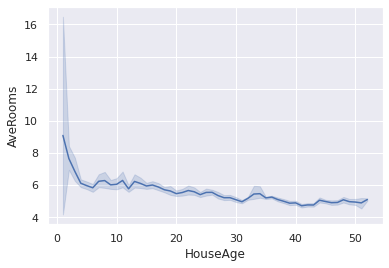

In [ ]:
sns.lineplot(x=df["HouseAge"], y = df["AveRooms"])

Se observa como las viviendas más nuevas tienen más habitaciones, se entiende que cada vez se intenta aprovechar mejor el espacio.

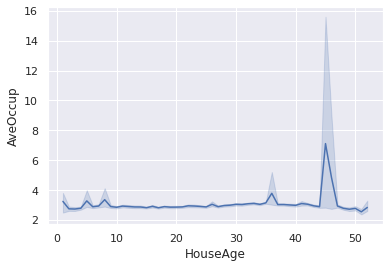

In [ ]:
sns.lineplot(x=df["HouseAge"], y = df["AveOccup"])

Se observa como el rango de antiguedad de la vivienda que más ocupación tiene es entre los 40 a 50 años.

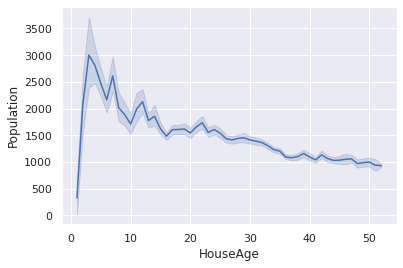

In [ ]:
sns.lineplot(x=df["HouseAge"], y = df["Population"])

### Dividiendo el dataset en conjunto de entrenamiento y validación

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state= 0)

Se divide el dataset (Variables X y Y) en conjunto de entrenamiento y testing con una relación 75% / 25%.

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(15480, 8) (5160, 8)
(15480, 1) (5160, 1)


### Escalando las variables para el estudio

Se mantendrán las variables escaladas y las normales para poder evaluar si existe alguna variación.

*Se utilizarán varios métodos para el escalado de variables*


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_minmax = mms.fit_transform(X_train)
X_test_minmax = mms.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

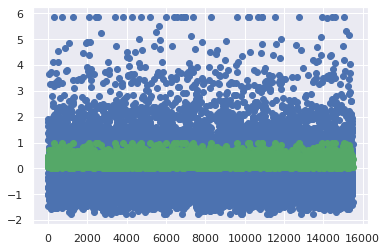

In [ ]:
xx = np.arange(len(X_train_sc))
yy1= X_train_sc[:,0]
yy2= X_train_minmax[:,0]
plt.scatter(xx,yy1, color = "b")
plt.scatter(xx,yy2, color = "g")

El método que arroja datos más uniformes es el Min-Max Scaler, con lo cual serán los datos que se utilizarán.

In [ ]:
import statsmodels.api as sm
modelo_OLS = sm.OLS(Y_train, X_train)
fitted = modelo_OLS.fit()
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS                Adj. R-squared (uncentered): 0.894     
Dependent Variable:     Median_house_value AIC:                         35966.7677
Date:                   2021-07-22 09:29   BIC:                         36027.9462
No. Observations:       15480              Log-Likelihood:              -17975.   
Df Model:               8                  F-statistic:                 1.632e+04 
Df Residuals:           15472              Prob (F-statistic):          0.00      
R-squared (uncentered): 0.894              Scale:                       0.59753   
--------------------------------------------------------------------------------------
                   Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
--------------------------------------------------------------------------------------
MedInc             0.5169       0.0049     105.5412     0.0000      0.5073      0.5265
HouseAge           0.0159       0.0005      29.7855     0.0000      0.0148      0.0169
AveRooms          -0.1797       0.0070     -25.4918     0.0000     -0.1935     -0.1659
AveBedrms          0.8497       0.0339      25.0803     0.0000      0.7833      0.9161
Population         0.0000       0.0000       0.8623     0.3885     -0.0000      0.0000
AveOccup          -0.0060       0.0009      -6.3941     0.0000     -0.0078     -0.0042
Latitude          -0.0627       0.0041     -15.2345     0.0000     -0.0707     -0.0546
Longitude         -0.0160       0.0013     -12.2233     0.0000     -0.0185     -0.0134
----------------------------------------------------------------------------------
Omnibus:                  3419.817           Durbin-Watson:              1.996    
Prob(Omnibus):            0.000              Jarque-Bera (JB):           10741.283
Skew:                     1.128              Prob(JB):                   0.000    
Kurtosis:                 6.400              Condition No.:              10226    
==================================================================================
* The condition number is large (1e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [ ]:
modelo_OLS = sm.OLS(Y_train, X_train_minmax)
fitted = modelo_OLS.fit()
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS                Adj. R-squared (uncentered): 0.894     
Dependent Variable:     Median_house_value AIC:                         35930.1242
Date:                   2021-07-22 09:29   BIC:                         35991.3026
No. Observations:       15480              Log-Likelihood:              -17957.   
Df Model:               8                  F-statistic:                 1.637e+04 
Df Residuals:           15472              Prob (F-statistic):          0.00      
R-squared (uncentered): 0.894              Scale:                       0.59611   
---------------------------------------------------------------------------------------
            Coef.        Std.Err.         t          P>|t|        [0.025        0.975] 
---------------------------------------------------------------------------------------
x1           8.0257        0.0654      122.7112      0.0000        7.8975        8.1539
x2           1.0909        0.0246       44.4146      0.0000        1.0428        1.1391
x3         -27.6313        0.9787      -28.2337      0.0000      -29.5496      -25.7130
x4          34.3671        1.1141       30.8483      0.0000       32.1834       36.5509
x5           2.0313        0.2002       10.1487      0.0000        1.6390        2.4236
x6          -3.2383        0.5613       -5.7698      0.0000       -4.3384       -2.1382
x7          -0.4667        0.0312      -14.9613      0.0000       -0.5279       -0.4056
x8          -0.4179        0.0325      -12.8420      0.0000       -0.4817       -0.3541
----------------------------------------------------------------------------------
Omnibus:                  3126.792           Durbin-Watson:              1.993    
Prob(Omnibus):            0.000              Jarque-Bera (JB):           15203.468
Skew:                     0.899              Prob(JB):                   0.000    
Kurtosis:                 7.510              Condition No.:              198      
==================================================================================

"""

In [ ]:
modelo_OLS = sm.OLS(Y_train, X_train_sc)
fitted = modelo_OLS.fit()
fitted.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS                Adj. R-squared (uncentered): 0.144     
Dependent Variable:     Median_house_value AIC:                         68300.0982
Date:                   2021-07-22 09:29   BIC:                         68361.2766
No. Observations:       15480              Log-Likelihood:              -34142.   
Df Model:               8                  F-statistic:                 327.0     
Df Residuals:           15472              Prob (F-statistic):          0.00      
R-squared (uncentered): 0.145              Scale:                       4.8247    
----------------------------------------------------------------------------------------
           Coef.        Std.Err.          t           P>|t|         [0.025        0.975]
----------------------------------------------------------------------------------------
x1         0.8319         0.0280        29.7437       0.0000        0.7771        0.8867
x2         0.1209         0.0197         6.1409       0.0000        0.0823        0.1595
x3        -0.2618         0.0522        -5.0146       0.0000       -0.3641       -0.1594
x4         0.3041         0.0480         6.3323       0.0000        0.2099        0.3982
x5        -0.0087         0.0189        -0.4631       0.6433       -0.0457        0.0282
x6        -0.0298         0.0177        -1.6833       0.0923       -0.0646        0.0049
x7        -0.8924         0.0541       -16.5050       0.0000       -0.9983       -0.7864
x8        -0.8639         0.0531       -16.2653       0.0000       -0.9680       -0.7597
----------------------------------------------------------------------------------
Omnibus:                   3297.684           Durbin-Watson:              0.215   
Prob(Omnibus):             0.000              Jarque-Bera (JB):           9782.096
Skew:                      1.108              Prob(JB):                   0.000   
Kurtosis:                  6.202              Condition No.:              7       
==================================================================================

"""

Aqui se observa como, al escalar las variables, el P valor es determiannte en todas las variables (en el caso del escalador MinMaxScaler) sin embargo, cuando se evalúan las estadisticas con los dátos sin escalar, se observa como la variable que menos determina el precio de la vivienda es la de "Population" (Coincidiendo con las variables escaladas con el método "Standar Scaller").

## Aplicando algoritmos de regresión para predecir los resultados

### Regresión lineal

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, max_error

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_minmax,Y_train)
y_pred_linreg = lin_reg.predict(X_test_minmax)
print("Train score = %.2f%%" % (lin_reg.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (lin_reg.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, y_pred_linreg))
print("R2 score = %0.3f"%r2_score(Y_test, y_pred_linreg))

Train score = 61.10%
Test score = 59.12%
Mean absolute error = 0.537
R2 score = 0.591


El modelo puede determinar con un 61% de precisión con los datos de entrenamiento y se ha logrado un 59% de precisión con los datos de testing.

### Regresión del arbol de decisiones

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(criterion="mse",min_samples_leaf=2, min_samples_split=18)
reg_tree.fit(X_train_minmax, Y_train)
y_pred_reg_tree = reg_tree.predict(X_test_minmax)
print("Train score = %.2f%%" % (reg_tree.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (reg_tree.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, y_pred_reg_tree))
print("R2 score = %0.3f"%r2_score(Y_test, y_pred_reg_tree))

Train score = 90.20%
Test score = 67.90%
Mean absolute error = 0.426
R2 score = 0.679


El modelo puede determinar con un 90% de precisión con los datos de entrenamiento y se ha logrado un 67,7% de precisión con los datos de testing.

### Support Vector Machine (rbf)

In [ ]:
from sklearn.svm import SVR
svm_rbf = SVR(kernel="rbf")
svm_rbf.fit(X_train_minmax, Y_train.values.ravel())
y_pred_svm_rbf=svm_rbf.predict(X_test_minmax)
print("Train score = %.2f%%" % (svm_rbf.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (svm_rbf.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, y_pred_svm_rbf))
print("R2 score = %0.3f"%r2_score(Y_test, y_pred_svm_rbf))

Train score = 66.59%
Test score = 65.26%
Mean absolute error = 0.453
R2 score = 0.653


El modelo puede determinar con un 66.5% de precisión con los datos de entrenamiento y se ha logrado un 65% de precisión con los datos de testing.

### Support Vector Machine (Poly)

In [ ]:
from sklearn.svm import SVR
svm_poly = SVR(kernel="poly", degree=2)
svm_poly.fit(X_train_minmax, Y_train.values.ravel())
y_pred_svm_poly=svm_poly.predict(X_test_minmax)
print("Train score = %.2f%%" % (svm_poly.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (svm_poly.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, y_pred_svm_poly))
print("R2 score = %0.3f"%r2_score(Y_test, y_pred_svm_poly))

Train score = 58.47%
Test score = 53.49%
Mean absolute error = 0.517
R2 score = 0.535


El modelo puede determinar con un 58% de precisión con los datos de entrenamiento y se ha logrado un 53,5% de precisión con los datos de testing.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, random_state=0)
forest_reg.fit(X_train, Y_train.values.ravel())
Y_pred_forest = forest_reg.predict(X_test)
print("Train score = %.2f%%" % (forest_reg.score(X_train,Y_train)*100))
print("Test score = %.2f%%"% (forest_reg.score(X_test,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, Y_pred_forest))
print("R2 score = %0.3f"%r2_score(Y_test, Y_pred_forest))

Train score = 95.75%
Test score = 79.48%
Mean absolute error = 0.338
R2 score = 0.795


El modelo puede determinar con un 95,75% de precisión con los datos de entrenamiento y se ha logrado un 79,8% de precisión con los datos de testing, siendo hasta ahora el mejor modelo predictivo.

KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=4,algorithm="brute", p=1)
knr.fit(X_train_minmax, Y_train)
y_pred_knr=knr.predict(X_test)
print("Train score = %.2f%%" % (knr.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (knr.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, y_pred_knr))
print("R2 score = %0.3f"%r2_score(Y_test, y_pred_knr))

Train score = 83.72%
Test score = 71.74%
Mean absolute error = 1.373
R2 score = -0.787


El modelo puede determinar con un 83,7% de precisión con los datos de entrenamiento y se ha logrado un 71,74,7% de precisión con los datos de testing.

In [ ]:
k_valores = np.arange(1,15,1)
train_score_arr = []
test_score_arr = []

for k in k_valores:
    knr1 = KNeighborsRegressor(n_neighbors=k, p=1)
    knr1.fit(X_train_minmax,Y_train)

    train_score = knr1.score(X_train_minmax, Y_train)
    train_score_arr.append(train_score*100)
    
    test_score = knr1.score(X_test_minmax, Y_test)
    test_score_arr.append(test_score*100)


    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, test_score*100))

k=1, train_accuracy=100.00%, test_accuracy=58.51%
k=2, train_accuracy=89.73%, test_accuracy=66.99%
k=3, train_accuracy=85.82%, test_accuracy=70.34%
k=4, train_accuracy=83.72%, test_accuracy=71.74%
k=5, train_accuracy=82.21%, test_accuracy=72.33%
k=6, train_accuracy=81.15%, test_accuracy=72.42%
k=7, train_accuracy=80.35%, test_accuracy=72.54%
k=8, train_accuracy=79.72%, test_accuracy=72.71%
k=9, train_accuracy=79.11%, test_accuracy=72.83%
k=10, train_accuracy=78.62%, test_accuracy=72.76%
k=11, train_accuracy=78.09%, test_accuracy=72.56%
k=12, train_accuracy=77.74%, test_accuracy=72.36%
k=13, train_accuracy=77.35%, test_accuracy=72.23%
k=14, train_accuracy=77.05%, test_accuracy=72.12%


Observando los distintos resultados de los diferentes k vecinos se decide trabajar con n_neighbors = 5.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5, p=1)
knr.fit(X_train_minmax, Y_train)
y_pred_knr=knr.predict(X_test)
print("Train score = %.2f%%" % (knr.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (knr.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test,y_pred_knr))
print("R2 score = %.3f"%r2_score(Y_test, y_pred_knr))

Train score = 82.21%
Test score = 72.33%
Mean absolute error = 1.641
R2 score = -1.493


El modelo puede determinar con un 82% de precisión con los datos de entrenamiento y se ha logrado un 72,33% de precisión con los datos de testing.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train_minmax,Y_train.values.ravel())
y_pred_gbr=gbr.predict(X_test_minmax)
print("Train score = %.2f%%" % (gbr.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (gbr.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test,y_pred_gbr))
print("R2 score = %0.4f"%r2_score(Y_test, y_pred_gbr))

Train score = 80.50%
Test score = 77.88%
Mean absolute error = 0.373
R2 score = 0.7788


El modelo puede determinar con un 80,5% de precisión con los datos de entrenamiento y se ha logrado un 77,9% de precisión con los datos de testing.

Despues de aplicar los distintos algoritmos de regresión, se observa que el mejor algoritmo es el de "Random Forest", obteniendo así un error medio absoluto de 0.338 (el más bajo de todos), un valor de R2 de 0.795, una precisión con el comjunto de entrenamento del 95.75% y una precisión con el conjunto de testing del 79,48%.

## Depurando los datos del dataframe

Se grafican las variables para determinar los valores que estan muy alejados de los valores medios (outliers) para ver que tanto afectan los resultados del algoritmo seleccionado.

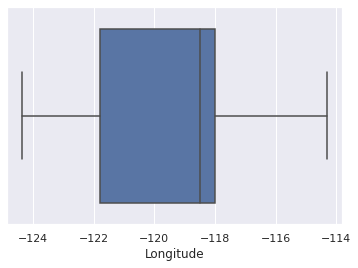

In [ ]:
sns.boxplot(x=df["Longitude"])

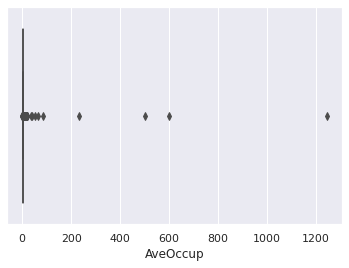

In [ ]:
sns.boxplot(x=df["AveOccup"])

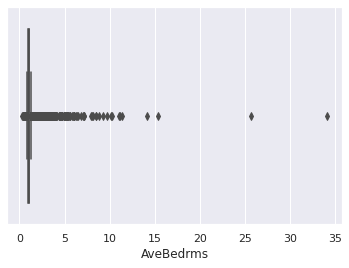

In [ ]:
sns.boxplot(x=df["AveBedrms"])

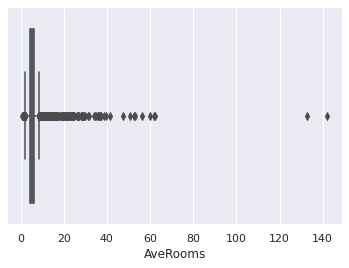

In [ ]:
sns.boxplot(x=df["AveRooms"])

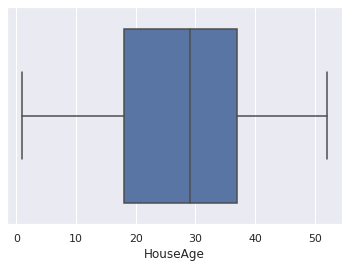

In [ ]:
sns.boxplot(x=df["HouseAge"])

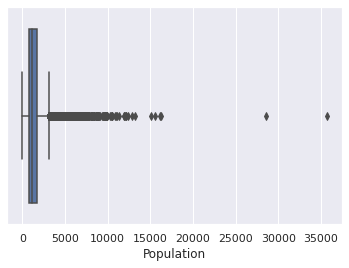

In [ ]:
sns.boxplot(x=df["Population"])

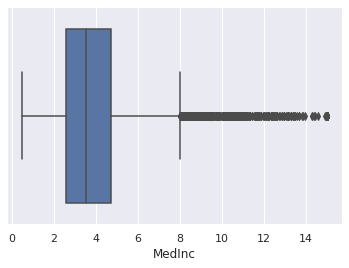

In [ ]:
sns.boxplot(x=df["MedInc"])

Se eliminan los valores de las variables "AveOccup", "AveBedrms", "AveRooms", "Population", "MedInc", que son en los que se observaron los mayores cesgos en los datos (se entiende que unas viviendas con un numero de habitaciones mayor de 40, y hasta un máximo de 141, provienen de un error a la hora de recolectar los datos)

In [ ]:
df = df.drop(df[df['AveOccup']>5].index)
df = df.drop(df[df['AveBedrms']>4].index)
df = df.drop(df[df['AveRooms']>8].index)
df = df.drop(df[df['Population']>3000].index)
df = df.drop(df[df['MedInc']>14].index)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median_house_value
count,18308.000000,18308.000000,18308.000000,18308.000000,18308.000000,18308.000000,18308.000000,18308.000000,18308.000000
mean,3.759930,29.610007,5.204922,1.060588,1222.135624,2.859802,35.667424,-119.623471,2.042368
std,1.689133,12.316734,1.105185,0.110734,615.218475,0.671912,2.144077,2.006075,1.131006
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.541700,19.000000,4.436681,1.002888,777.000000,2.407777,33.940000,-121.830000,1.172000
50%,3.506900,30.000000,5.183750,1.046447,1125.000000,2.788235,34.280000,-118.560000,1.795000
75%,4.664850,38.000000,5.948602,1.095764,1586.000000,3.238431,37.730000,-118.040000,2.625000
max,13.809300,52.000000,7.995506,3.099338,2999.000000,5.000000,41.950000,-114.550000,5.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5311c9f90>,
      dtype=object)

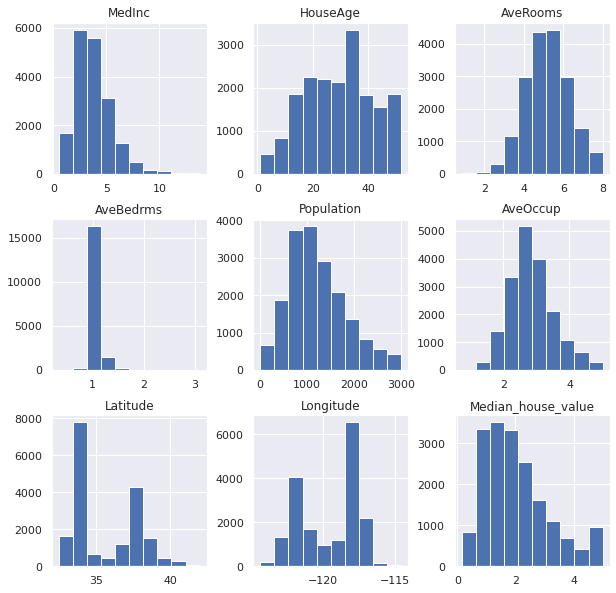

In [ ]:
df.hist(figsize=(10,10))

Por los gráficos, se observa como ahora si aparece una distribución menos cesgada en el dataset.

## Aplicando nuevamente el algoritmo seleccionado

In [ ]:
X = df.iloc[:,0:-1].values
Y = df.iloc[:,-1].values
print(X.shape, Y.shape)

(18308, 8) (18308,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(14646, 8) (3662, 8)
(14646,) (3662,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_minmax = mms.fit_transform(X_train)
X_test_minmax = mms.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, random_state=0)
forest_reg.fit(X_train_minmax, Y_train)
Y_pred_forest = forest_reg.predict(X_test_minmax)
print("Train score = %.2f%%" % (forest_reg.score(X_train_minmax,Y_train)*100))
print("Test score = %.2f%%"% (forest_reg.score(X_test_minmax,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, Y_pred_forest))
print("R2 score = %0.3f"%r2_score(Y_test, Y_pred_forest))

Train score = 95.70%
Test score = 81.50%
Mean absolute error = 0.321
R2 score = 0.815


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(min_samples_leaf=2, min_samples_split=4, random_state=0)
forest_reg.fit(X_train, Y_train)
Y_pred_forest = forest_reg.predict(X_test)
print("Train score = %.2f%%" % (forest_reg.score(X_train,Y_train)*100))
print("Test score = %.2f%%"% (forest_reg.score(X_test,Y_test)*100))
print("Mean absolute error = %.3f"%mae(Y_test, Y_pred_forest))
print("R2 score = %0.3f"%r2_score(Y_test, Y_pred_forest))

Train score = 95.70%
Test score = 81.51%
Mean absolute error = 0.321
R2 score = 0.815


Con estos últimos resultados se observa como, el tener escaladas las variables, no afectó en nada al resultado obtenido y que al haber limpiado un poco el dataset y haber eliminado los outliers solo aumentó la precisión en el conjunto de testing un 2%.

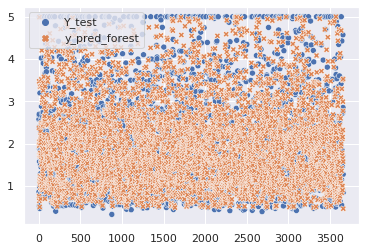

In [ ]:
Y_test_final = pd.DataFrame(data=Y_test)
Y_test_final["y_pred_forest"] = Y_pred_forest
Y_test_final.columns=["Y_test","y_pred_forest"]
Y_test_final
sns.scatterplot(data = Y_test_final[["Y_test","y_pred_forest"]])

Por ultimo, una representación gráfica de los datos obtenidos en la predicción vs los datos reales del conjunto de test, donde se observa como en la grán mayoría de los casos ambos valores coinciden.